In [23]:
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.datasets import cifar10,cifar100
from sklearn.datasets import load_iris
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()



# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

initializer = keras.initializers.glorot_normal(seed=None)
# Build neural network
model = models.Sequential()
model.add(Dense(1024,kernel_initializer=initializer, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adagrad',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history=model.fit(X_train, y_train,
          batch_size=256,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.9073 - acc: 0.6957 - val_loss: 0.5608 - val_acc: 0.7853
Epoch 2/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.4197 - acc: 0.8441 - val_loss: 0.4685 - val_acc: 0.8280
Epoch 3/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.3544 - acc: 0.8696 - val_loss: 0.4120 - val_acc: 0.8479
Epoch 4/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.3156 - acc: 0.8829 - val_loss: 0.3769 - val_acc: 0.8610
Epoch 5/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.2919 - acc: 0.8915 - val_loss: 0.3430 - val_acc: 0.8754
Epoch 6/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.2740 - acc: 0.8975 - val_loss: 0.3374 - val_acc: 0.8824
Epoch 7/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.2582 - acc: 0.9040 - val_loss: 0.3761 - 

In [24]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_43 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_44 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_45 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 10)               

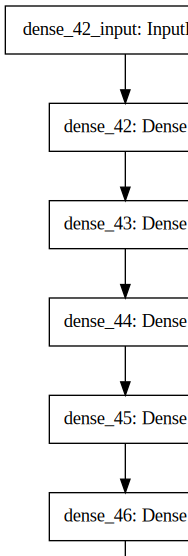

In [25]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

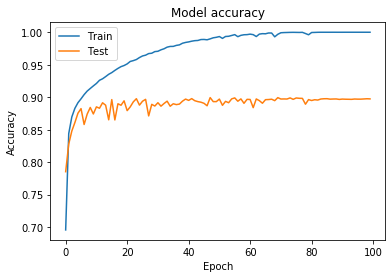

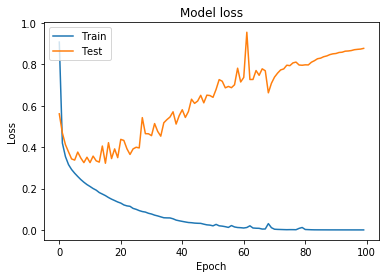

In [26]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()